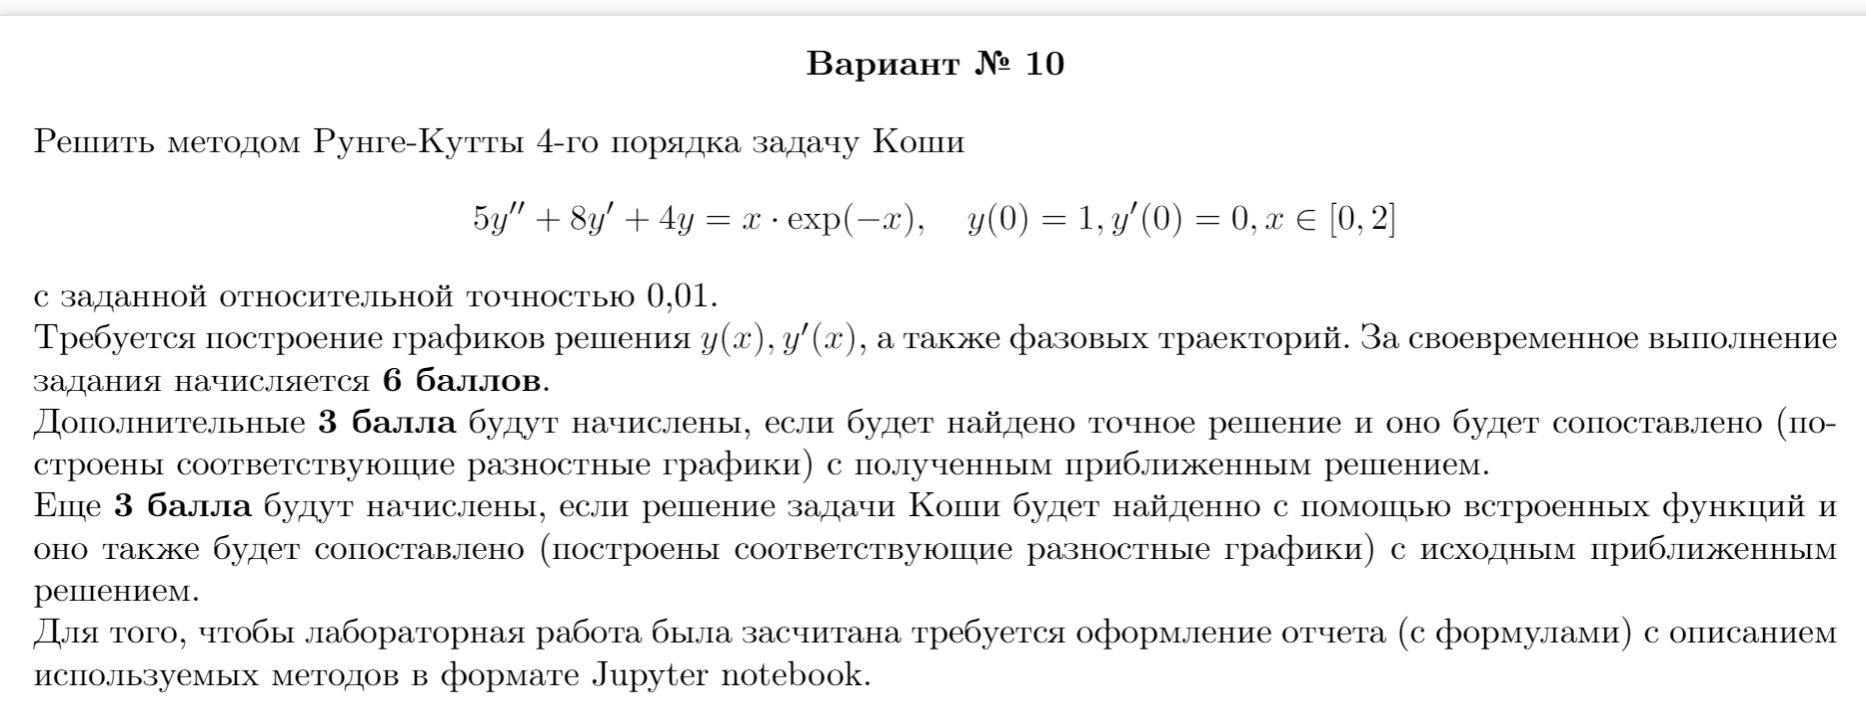

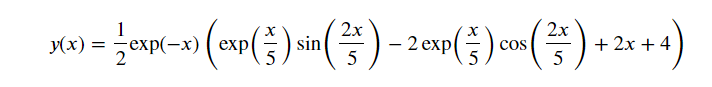

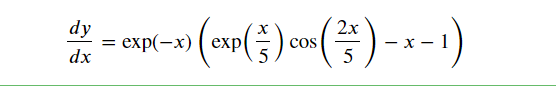

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.setrecursionlimit(10**6)

In [2]:
def f(x):
    return (np.exp(-x)*(4 + 2*x - 2*np.cos((2*x)/5.)*np.exp(x/5.) + np.exp(x/5.)*np.sin((2*x)/5.)))/2.
    
def df(x):
    return np.exp(-x)*(-1 - x + np.cos((2*x)/5.)*np.exp(x/5.))

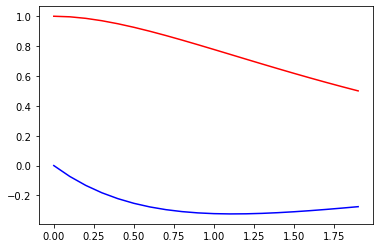

In [4]:
x = np.arange(0,2,0.1)
fig, ax = plt.subplots()
ax.plot(x,f(x), c='r')
ax.plot(x,df(x),c='b')
plt.show()

In [5]:
def fU(x,y,z):     #its dz/dx
    return (-8*z - 4*y + x * np.exp(-x))/5
def fV(z):
    return z

In [6]:
def RK4_step(x,y,z, h = 0.1):#returns y and z values for further plotting z is derivative
    q0 = fU(x,y,z)
    k0 = fV(z)
    q1 = fU(x + h/2, y + k0*h/2, z + q0*h/2)
    k1 = fV(z + q0*h/2)
    q2 = fU(x + h/2, y + k1*h/2, z + q1*h/2) 
    k2 = fV(z + q1*h/2)
    q3 = fU(x + h, y + k2*h, z + q2*h)
    k3 = fV(z + q2*h)
    return [z+h*(q0+2*q1+2*q2+q3)/6.0, y+h*(k0+2*k1+2*k2+k3)/6.0]

In [8]:
y_value = [1]
dy_value = [0]
#start_points
delta_x = 0.1
#y = [0, 1]
#z = [0, 0] #z = dy/dx
x_value = np.arange(0.0, 2.0, delta_x)
y_start = 1
z_start = 0
#x_start = 0
for x_start in x_value:
    z_next, y_next = RK4_step(x_start,y_start,z_start,delta_x)
    y_start, z_start = y_next, z_next
    y_value.append(y_next)
    dy_value.append(z_next)

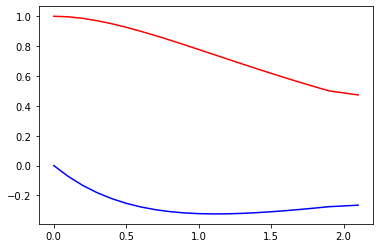

In [9]:
y_value = np.array(y_value)
dy_value = np.array(dy_value)
x_value = np.append(x_value,2.1)
x_value,y_value,dy_value
fig, ax = plt.subplots()
ax.plot(x_value,y_value, c='r')
ax.plot(x_value,dy_value,c='b')
plt.show()

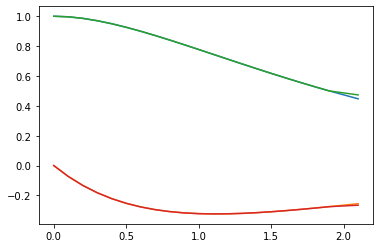

In [19]:
fig, ax = plt.subplots()

f_value, df_value = f(x_value), df(x_value)
ax.plot(x_value,f_value)
ax.plot(x_value,df_value)
ax.plot(x_value,y_value)
ax.plot(x_value,dy_value)
plt.show()

In [21]:
from scipy.integrate import odeint,solve_ivp

def model(x,yarr):
    y=yarr[0]
    z=yarr[1]
    return [z,1/5*(x*np.exp(-x)-8*z-4*y)]

sols=solve_ivp(model,[0, 2],[1,0],method='LSODA',min_step=0.01,max_step=delta_x)

x2=sols.t
y2=sols.y[0]
yy2=sols.y[1]

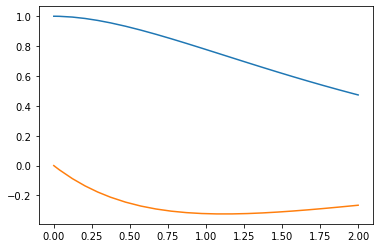

In [29]:
fig, ax = plt.subplots()
ax.plot(x2,y2)
ax.plot(x2,yy2)
plt.show()